In [2]:
%matplotlib inline

import warnings; warnings.simplefilter('ignore')

In [3]:
import pandas as pd
import os
from functools import reduce
import matplotlib.pyplot as plt
inline_rc = dict(plt.rcParams)
import numpy as np

from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import ks_2samp
from scipy.stats import entropy
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import nbinom
from scipy.stats.mstats import gmean
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import average
from scipy.cluster.hierarchy import dendrogram


import statsmodels.api as sm
lowess = sm.nonparametric.lowess
import math

import scipy.spatial.distance
from scipy.spatial.distance import *

import sklearn
import sklearn.preprocessing

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns

In [24]:
filepath = "schuldiner_esp.txt"
emap = pd.read_csv(filepath, sep="\t").fillna(0.0)

In [25]:
emap.head()

,ft1_systematic_name,ft1_gene_name,ft1_allele,ft2_systematic_name,ft2_gene_name,ft2_allele,int_score,corr_coeff,dataset_name
0,YAL007C,ERP2,deletion,YAL007C,ERP2,deletion,0.000000,1.000000,Schuldiner et al.; early secretory pathway
1,YAL007C,ERP2,deletion,YAL023C,PMT2,deletion,0.000000,0.037051,Schuldiner et al.; early secretory pathway
2,YAL007C,ERP2,deletion,YAL026C,DRS2,deletion,0.000000,-0.112672,Schuldiner et al.; early secretory pathway
3,YAL007C,ERP2,deletion,YAL042W,ERV46,deletion,-0.074052,-0.022476,Schuldiner et al.; early secretory pathway
4,YAL007C,ERP2,deletion,YAL058W,CNE1,deletion,-0.365660,0.054261,Schuldiner et al.; early secretory pathway


In [46]:
emp = pd.pivot_table(emap, values='int_score', index=['ft1_systematic_name'], columns=['ft2_systematic_name'], fill_value = 0.0, aggfunc=np.sum).fillna(0.0)

In [47]:
emp = pd.DataFrame(emp.to_records())

In [48]:
cols = emp.columns.drop('ft1_systematic_name')
for c in cols:
    emp[c] = emp[c].astype(float) 

In [49]:
cols = emp.columns.drop(['YAL007C','YAL023C','YAL026C'])
emp = emp[cols].set_index('ft1_systematic_name')

In [63]:
X = emp.values
r = []

for i,x in enumerate(X):
    y = []
    for j,y in enumerate(X):
        if np.isnan(cosine(x,y)):
            print (i,j)

0 422
0 423
1 422
1 423
2 422
2 423
3 422
3 423
4 422
4 423
5 422
5 423
6 422
6 423
7 422
7 423
8 422
8 423
9 422
9 423
10 422
10 423
11 422
11 423
12 422
12 423
13 422
13 423
14 422
14 423
15 422
15 423
16 422
16 423
17 422
17 423
18 422
18 423
19 422
19 423
20 422
20 423
21 422
21 423
22 422
22 423
23 422
23 423
24 422
24 423
25 422
25 423
26 422
26 423
27 422
27 423
28 422
28 423
29 422
29 423
30 422
30 423
31 422
31 423
32 422
32 423
33 422
33 423
34 422
34 423
35 422
35 423
36 422
36 423
37 422
37 423
38 422
38 423
39 422
39 423
40 422
40 423
41 422
41 423
42 422
42 423
43 422
43 423
44 422
44 423
45 422
45 423
46 422
46 423
47 422
47 423
48 422
48 423
49 422
49 423
50 422
50 423
51 422
51 423
52 422
52 423
53 422
53 423
54 422
54 423
55 422
55 423
56 422
56 423
57 422
57 423
58 422
58 423
59 422
59 423
60 422
60 423
61 422
61 423
62 422
62 423
63 422
63 423
64 422
64 423
65 422
65 423
66 422
66 423
67 422
67 423
68 422
68 423
69 422
69 423
70 422
70 423
71 422
71 423
72 422
72 42

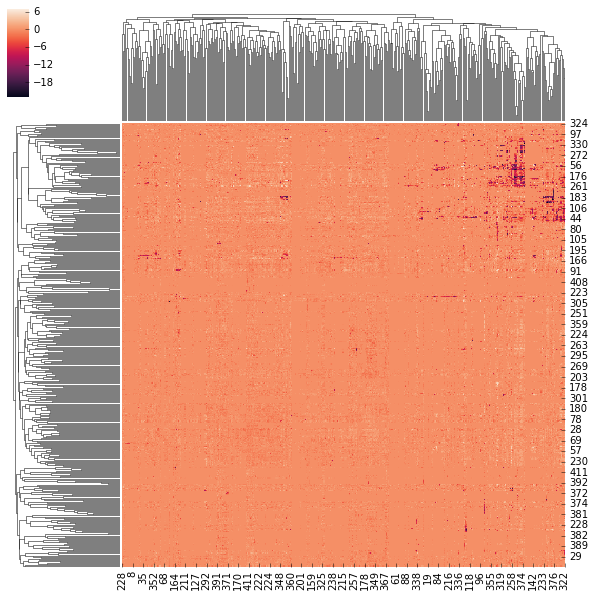

In [64]:
sns.clustermap(emp.values[0:420],method='average',metric='cosine')

In [38]:
emp

,ft1_systematic_name,YAL042W,YAL058W,YAR002C-A,YAR042W,YBL011W,YBL017C,YBL040C,YBL082C,YBL102W,...,YPR003C,YPR028W,YPR063C,YPR071W,YPR091C,YPR114W,YPR148C,YPR149W,YPR173C,YPR183W
0,YAL007C,-0.074052,-0.36566,0.00000,-0.63647,-0.66017,0.71568,-0.416080,-0.12850,-0.85104,...,-0.789320,-0.401560,0.762890,-0.963760,-0.737670,0.616830,-0.568480,-0.012112,0.000000,0.102380
1,YAL023C,0.000000,-1.67330,0.00000,-0.56384,0.13523,-1.82560,0.227210,-4.88420,-0.31800,...,1.429800,-0.214310,1.188400,-0.103670,-0.201380,0.038642,0.756750,1.232300,0.000000,-9.530400
2,YAL026C,0.000000,-1.97130,0.08798,-9.76270,1.65270,0.18197,-0.706830,0.00000,0.11038,...,0.879400,-0.116400,0.591780,-0.733940,0.458420,1.019000,-0.335610,0.285660,0.000000,1.182200
3,YAL042W,0.000000,0.00000,-0.85659,0.38363,0.55693,-0.17365,-1.285700,0.40581,0.67258,...,0.598980,-0.386060,0.640770,0.125530,0.661950,0.067569,0.853580,0.517020,-0.382170,0.144380
4,YAL058W,0.000000,0.00000,-1.10500,0.68198,0.57023,0.56755,0.213560,-1.08220,0.69988,...,0.882970,0.426990,0.740880,0.555260,-0.052697,-0.599150,0.412110,-0.174430,0.201270,-0.444080
5,YAR002C-A,0.000000,0.00000,0.00000,0.00000,0.55879,-0.05352,-0.469960,0.15175,-0.38351,...,-1.052000,0.159740,-0.900180,-1.912900,-0.302920,0.893790,-1.424700,-0.892450,0.000000,-0.131320
6,YAR042W,0.000000,0.00000,0.00000,0.00000,-0.14288,-0.32861,-0.058863,0.90525,-1.08850,...,-0.496480,0.484000,-0.530170,-0.745840,-1.089600,0.028763,-0.053501,-0.443740,0.000000,0.234360
7,YBL011W,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.125800,-1.19650,-0.75240,...,-0.424410,-0.112320,0.142120,-0.520280,-0.149790,0.515560,-0.543460,0.528490,0.505350,0.535490
8,YBL017C,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,-1.22660,0.17833,...,1.163400,0.512920,-0.147050,0.973090,0.650770,-0.040227,0.153360,0.715270,-0.991500,-2.218200
9,YBL040C,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,1.47160,-1.24100,...,-0.446110,-0.910040,-0.315570,-0.289680,0.000000,-0.594010,-0.090671,0.064738,-0.147450,0.000000


In [ ]:
sns.clustermap(pdist(emp,'euclidean'))

In [16]:
emp.loc[~(emp==0).all(axis=0)]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match